<a href="https://colab.research.google.com/github/vertumno/probabilidade-analise/blob/master/DiscoveringTheData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To Do List: 
- Precisa ainda refazer os links ao modo como é usado na variavel cursos_url, para tirar a dependência do bit.do
- Fazer o mesmo processo para as demais turnos, manha e noite.
- Testar o projeto usando outros anos, ex 2016_1, 2016_2,....


In [0]:
import pandas as pd

### A idéia é passar como parâmetro na construção do objeto o ano/período da turma a ser examinada.

```python
      turmas_2015_2 = Turmas('2015_2')
```
A agregação dos dados foi feita de modo que:
  - Existem 3 dataframes usados:
    - turmas: Representa todas as turmas cadastradas na UFRN.
    - notas: Agrega todas as notas lançadas na UFRN.
    - disciplinas: Contém todas as disciplinas cadastradas na UFRN.
  - Na função set_id_componente, foi descorbeto qual a id_componente que é representado pelo nome da disciplina RPMTI.
  - Em seguida é feito a coleta do id_curso para auxilho na busca dos dados.
  - Na função set_turmas_stats(self):
    - Uma lista com todos os id_turmas baseados no id_componente. Assim traduzimos o código da disciplina para o código da turma.
    - Um dataframe com todas as notas das turmas do curso do BTI.
    - A partir da listas das turmas aka. id_turmas, e pesquisando estas chaves no dataframe de all_bti_notas, é gerado um novo dataframe, 
    contendo apenas as notas referentes as turmas de RPMTI, o bti_rpmti_turmas, que será o dataframe final a ser analisado pelo grupo.



**O método: ** 
```python
      read_data(self)
```
- Pode gerar erros ou se tornar lento por conta da leitura dos dados serem diretos do servidor.



In [0]:

class Turmas(object):
  def __init__(self, searched_year):
    self.turmas_url = 'http://bit.do/turmas_ufrn_'+searched_year
    self.notas_url = 'http://bit.do/notas_ufrn_'+searched_year
    self.turmas = pd.DataFrame()
    self.notas = pd.DataFrame()
    self.rpmti_tarde = pd.DataFrame()
   
  def read_data(self):
    self.turmas = pd.read_csv(turmas_url, sep=';')
    self.notas = pd.read_csv(notas_url, sep=';')
   
  def set_id_componente(self):
    disciplinas_url = 'http://bit.do/componentes_curriculares_ufrn'
    disciplinas = pd.read_csv(disciplinas_url, sep=';', usecols=['id_componente','codigo','nome','unidade_responsavel'])
    
    self.id_componente = int(disciplinas[disciplinas['nome'] == 'RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI']['id_componente'])
    
  def set_id_curso(self):
    cursos_url = 'http://dados.ufrn.br/dataset/02526b96-cf40-4507-90b0-3afe5ddd53e7/resource/a10bc434-9a2d-491a-ae8c-41cf643c35bc/download/cursos-de-graduacao.csv'
    cursos_url = pd.read_csv(cursos_url, sep=';')
    
    self.id_curso = int(cursos_url[cursos_url['nome'] == 'TECNOLOGIA DA INFORMAÇÃO']['id_curso'])
  
  def set_turmas_stats(self):
    self.id_turmas = self.turmas[self.turmas['id_componente_curricular'] == self.id_componente]['id_turma'].unique()
    self.horarios = self.turmas[self.turmas['id_componente_curricular'] == self.id_componente]['descricao_horario'].unique()
    self.all_bti_turmas = self.notas[self.notas['id_curso'] == self.id_curso]
    
    cc = 0
    for it in self.horarios:
      if 'T' in it:
        self.rpmti_tarde = self.all_bti_turmas[self.all_bti_turmas['id_turma'] == self.id_turmas[cc]]
      cc = cc+1
      
    
  def remove_duplicates(self):
    self.rpmti_tarde = self.rpmti_tarde.drop_duplicates('discente', keep='first')
  
 

In [0]:
turmas_2015 = Turmas('2015_2')
turmas_2015.read_data()

In [0]:
turmas_2015.set_id_componente()
turmas_2015.set_id_curso()
turmas_2015.set_turmas_stats()

In [0]:
# Este dataframe raw, tem 3 linhas para cada aluno, alem de valores duplicados.
turmas_2015.remove_duplicates()


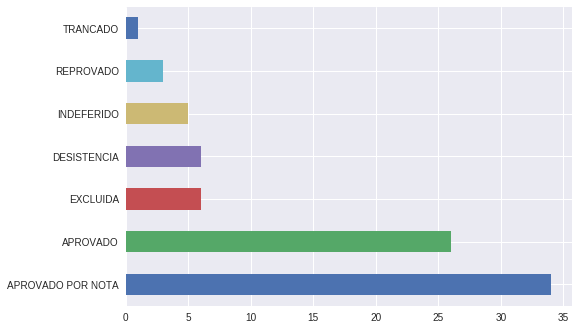

In [173]:
turmas_2015.rpmti_tarde['descricao'].value_counts().plot.barh()